In [4]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
boston = sd.load_boston()
# 把数据存入dataframe
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data['TARGET'] = boston.target
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# 对某些字段进行简单的分析  靠河28 不靠河22
data.pivot_table(index='CHAS',values=['TARGET'])

,TARGET
CHAS,
0.0,22.093843
1.0,28.440000


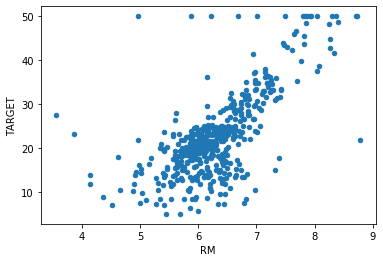

In [7]:
# 如果想使用这组数据训练线性模型训练，则要先验证特征与输出之间的关系是否是线性关系
data.plot.scatter(x='RM',y='TARGET')

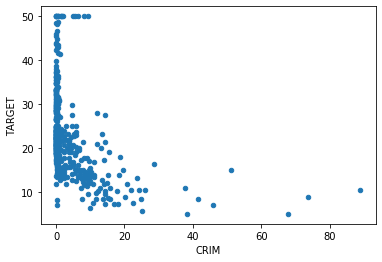

In [8]:
data.plot.scatter(x='CRIM',y='TARGET')

In [30]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as sm
x,y = data.iloc[:,:-1],data['TARGET']
# 整理输入集输出集，拆分测试集训练集
# random_state: 随机种子，对同一组数据使用相同的随机种子划分数据集，得到的结果一样
train_x,test_x,train_y,test_y =\
ms.train_test_split(x,y,test_size=0.1,random_state=9)
# 训练一个模型
model = lm.LinearRegression()
model.fit(train_x,train_y)
# 针对测试样本进行测试评估
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))


0.8412765520905379


In [39]:
# 用岭回归预测房价
model_2=lm.Ridge(alpha=100,max_iter=1000) 
model_2.fit(train_x,train_y)
pred_test_y2=model_2.predict(test_x)
print(sm.r2_score(test_y,pred_test_y2))

0.7987569430268203


In [32]:
# 用岭回归预测房价
model_3 = lm.Lasso(alpha=0.5,max_iter=1000)
model_3.fit(train_x,train_y)
pred_test_y3 = model_3.predict(test_x)
print(sm.r2_score(test_y,pred_test_y3))

0.7884359693156018


In [ ]:
# 看样子线性模型预测的更准一点